# Fake news Classifier

## Importing Libraries

In [112]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
#
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from joblib import dump, load

## Reading Data

In [113]:
df = pd.read_csv('../Data/CleanedData.csv')

In [114]:
df

,Unnamed: 0,content,label
0,0,obamas embarrassing farewell interview mom hip...,1
1,1,chinas guangdong gets new party boss former le...,0
2,2,pentagon notified us congress million military...,0
3,3,belgian soldiers shoot dead knife attacker bru...,0
4,4,thousands romanians rally ruling partys judici...,0
...,...,...,...
44893,44893,parent furious th grade class joins hateful pr...,1
44894,44894,trump administration proposes stricter obamaca...,0
44895,44895,feel good hoax us propaganda works syrian war ...,1
44896,44896,unremarkable virginia attacker shows difficult...,0


## Checking Data Once Again incase Missing Values or Null Values

In [115]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [116]:
print(df['label'].value_counts())

label
1    23481
0    21417
Name: count, dtype: int64


In [117]:
df.isnull().sum()

content    0
label      0
dtype: int64

In [118]:
df.isna().sum()

content    0
label      0
dtype: int64

In [119]:
df

,content,label
0,obamas embarrassing farewell interview mom hip...,1
1,chinas guangdong gets new party boss former le...,0
2,pentagon notified us congress million military...,0
3,belgian soldiers shoot dead knife attacker bru...,0
4,thousands romanians rally ruling partys judici...,0
...,...,...
44893,parent furious th grade class joins hateful pr...,1
44894,trump administration proposes stricter obamaca...,0
44895,feel good hoax us propaganda works syrian war ...,1
44896,unremarkable virginia attacker shows difficult...,0


## Splitting Data to Content And It's Label

In [120]:
X = df['content']
y = df['label']

### Train Test Split on the Data

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, stratify=y, test_size=0.2)

### Vectorizing The Data

In [122]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

## Loading in the models

In [129]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(max_iter=300, solver='liblinear', class_weight='balanced')
]


### Decalring and Initializing a best mode and best accuracy variable to capture the information

In [130]:
best_model = None
best_accuracy = 0

### Training and evaluating the model

In [131]:

best_model = None
best_accuracy = 0
best_model_name = ""

for model in models:
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)
    accuracy = accuracy_score(y_test, y_pred)
    
    model_name = type(model).__name__
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = model_name

print(f"\n✅ Best model: {best_model_name} with accuracy: {best_accuracy:.4f}")

DecisionTreeClassifier Accuracy: 0.9945
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       0.99      1.00      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

RandomForestClassifier Accuracy: 0.9951
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4284
           1       1.00      0.99      1.00      4696

    accuracy                           1.00      8980
   macro avg       0.99      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

LogisticRegression Accuracy: 0.9896
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg

### Confusion Matrix

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



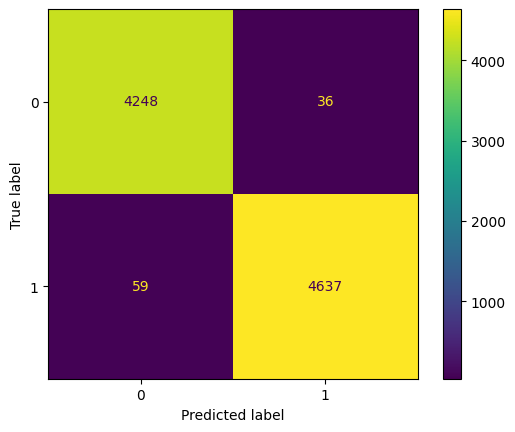

In [ ]:
y_pred = best_model.predict(X_test_vect)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(best_model, X_test_vect, y_test)
plt.show()
